In [1]:
from keras.datasets import reuters

In [3]:
(train_data, train_labels) , (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 19s 9us/step


In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

## Decoding the words
___

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 6s 12us/step


In [9]:
decoded_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## Preparing the data
___

In [11]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

To vectorize the labels, there are two possibilities: you can cast the label list as an integer tensor, or you can use one-hot encoding.One-hot encoding is a widely used format  for categorical data, also called categorical encoding. 

In [12]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

### There is a built-in way to do this in Keras

In [13]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Building the Network

In [19]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

The last layer uses a softmax activation.It  means  the network  will  output a probability  distribution over  the  46
different output classes—for every input 
sample, the network will produce a 46-
dimensional output vector, where 
output[i] is the probability that the sample
belongs to class i. The 46 scores will sum to 1.

The best loss function to use in this case is 
categorical_crossentropy.It measures
the distance between two probability distributions: here, between the probability dis-
tribution output by the network and the true
 distribution of the labels. By minimizing
the  distance  between  these  two  distribution
s,  you  train  the  network  to  output  some-
thing as close as possible to the true labels.

In [20]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

### Validating our approach

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [23]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 179us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 114us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 112us/step - loss: 1.0953 - acc: 0.7652 - val_loss: 1.1709 - val_acc: 0.7440
Epoch 4/20
7982/7982 [==============================] - 1s 108us/step - loss: 0.8697 - acc: 0.8163 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 107us/step - loss: 0.7035 - acc: 0.8475 - val_loss: 0.9847 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 108us/step - loss: 0.5667 - acc: 0.8800 - val_loss: 0.9413 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 109us/step - loss: 0.4584 - acc: 0.9045 - val_loss: 0.9093 - val_acc: 0.8010


## Plotting the training and Validation Loss 

In [24]:
import matplotlib.pyplot as plt

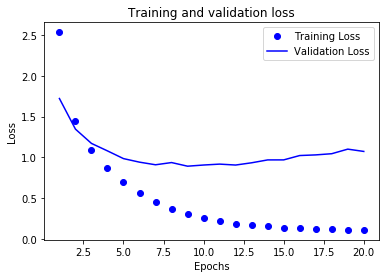

In [25]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting the training and validation accuracy

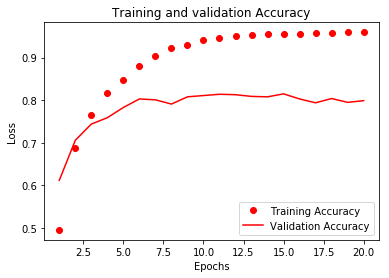

In [27]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'ro', label = 'Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label = 'Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Retraining the model from scratch

In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs = 9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 139us/step - loss: 2.6135 - acc: 0.4644 - val_loss: 1.7289 - val_acc: 0.6350
Epoch 2/9
7982/7982 [==============================] - 1s 116us/step - loss: 1.4074 - acc: 0.7082 - val_loss: 1.2747 - val_acc: 0.7310
Epoch 3/9
7982/7982 [==============================] - 1s 111us/step - loss: 1.0425 - acc: 0.7786 - val_loss: 1.1035 - val_acc: 0.7630
Epoch 4/9
7982/7982 [==============================] - 1s 113us/step - loss: 0.8180 - acc: 0.8322 - val_loss: 1.0270 - val_acc: 0.7820
Epoch 5/9
7982/7982 [==============================] - 1s 111us/step - loss: 0.6507 - acc: 0.8629 - val_loss: 0.9513 - val_acc: 0.8070
Epoch 6/9
7982/7982 [==============================] - 1s 109us/step - loss: 0.5297 - acc: 0.8904 - val_loss: 0.9206 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 1s 113us/step - loss: 0.4213 - acc: 0.9113 - val_loss: 0.9007 - val_acc: 0.8130
Epoch 8

In [30]:
results

[0.9836262176849964, 0.7858414960459524]

### Generating prediction on new data

In [31]:
predictions = model.predict(x_test)

In [32]:
predictions[1].shape

(46,)

In [34]:
np.sum(predictions[1])

1.0000001

In [38]:
np.argmax(predictions[1])

10

### Importance of having sufficiently Large Intermediate Layers

In [39]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs = 9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 140us/step - loss: 3.3717 - acc: 0.1968 - val_loss: 3.0189 - val_acc: 0.2200
Epoch 2/9
7982/7982 [==============================] - 1s 110us/step - loss: 2.7818 - acc: 0.2415 - val_loss: 2.6163 - val_acc: 0.2600
Epoch 3/9
7982/7982 [==============================] - 1s 110us/step - loss: 2.3909 - acc: 0.3696 - val_loss: 2.3056 - val_acc: 0.5360
Epoch 4/9
7982/7982 [==============================] - 1s 112us/step - loss: 2.0465 - acc: 0.5792 - val_loss: 2.0054 - val_acc: 0.5780
Epoch 5/9
7982/7982 [==============================] - 1s 111us/step - loss: 1.7386 - acc: 0.6026 - val_loss: 1.7910 - val_acc: 0.5980
Epoch 6/9
7982/7982 [==============================] - 1s 109us/step - loss: 1.5193 - acc: 0.6148 - val_loss: 1.6417 - val_acc: 0.5950
Epoch 7/9
7982/7982 [==============================] - 1s 110us/step - loss: 1.3808 - acc: 0.6374 - val_loss: 1.5675 - val_acc: 0.6210
Epoch 8